In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

## DataFrames

A DataFrame is what you get if you combine several Series side-by-side.  It's a rectangular table of data.  Each column could have a different data type.

In [107]:
pd.DataFrame

pandas.core.frame.DataFrame

Suppose that we have the following data: 

- `grades1` which is a set of grades on ps1
- `grades2` which is a set of grades on ps2
- For 6 students: Ben, May, Sue, Blake, Amy, Steve 

The scores look like this: 

```
     Ben May Sue Blake Amy Steve 
PS1   88  78  92    56  79    92
PS2   84  81  50    84  90    78
```

Lets make a DataFrame that contains this information: 

In [2]:
gradebook = pd.DataFrame('fill this out')
gradebook

ValueError: DataFrame constructor not properly called!

Oh, rats! These were not actually problem set 1 and problem set 2. The TA got lazy and just decided to make their scores on the exams be equal to the scores on their problem set. So, they just renamed the `PS1` and `PS2` names to be `midterm` and `final`. 

If the previous command puts the columns in the wrong order, we can fix that with the columns argument.

In this case, our DataFrame is small enough that we can easily see it all.  However, you'll often need to work with really large DataFrames, and you'll want to peek at a few rows to see what's inside.  You can do that with the `head()` method.

You can also specify the number of rows that you would like to see, by passing a single positional argument into the `head()` function. Suppose you wanted to see only three rows. 

In [116]:
gradebook.head(3)

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,50


If you need to work with an individual column, you can pull it out with dictionary notation. This looks like passing a list of strings into the data frame. If you wanted to pull the `midterm` grades, you would type: 

In this case, because there are no spaces or other special characters in the column name, we can also get it as an attribute.

student
Ben      88
May      78
Sue      92
Blake    56
Amy      79
Steve    92
Name: midterm, dtype: int64

This is an opinionated set of thoughts: 

1. If you are going to use a variable for an indexing call -- e.g. you're going to use it inside of a pd.DataFrame to select some rows, it is **OK** to use this attribute calling form. 
2. But, if you are pulling columns, it is usually more clear what you are doing if you use the dictionary notation. 

By the way, if you type part of the variable and hit tab, a Jupyter notebook will try to complete the variable name for you.  Because the attribute notation is so nice, it's worth selecting names that don't have spaces.  You may want to use undescores instead.

We can change columns by assignment.  Suppose that Alex realizes that Nick is a really harsh grader, and wants to add 10 points to final grades (so that he still gets good taeching evaluations, despite Nick's zeal)? 

When you are creating new coluns, you *need* to use disctionary style indexing -- this is because there just is not an attribute that exists on a data frame if you haven't made it already. 

Suppose that you are assign a homework, but your TA is nowhere to be found to grade it. In that case, you do the only natural thing, you assign everybody a 90, and see who comes in to complain about it. Nobody comes in to complain. 

NameError: name 'gradebook' is not defined

Oh shoot. The Dean is on to you and asks that you not give everybody a 90 on their homework. How can you use the `.drop()` method to delete the set of 90 scores that you created? You have to tell Pandas whether you mean a row or a column using the axis argument.

The axis keyword is very common in Pandas, but it's tricky to figure out which axis you want.  Here's a picture that's *supposed* to clear things up, though I found it rather confusing so your results may vary.

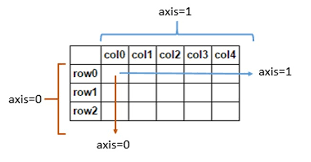

In [123]:

Image("axes.png", width = 400)

When you see axis 0, think about the direction down, or operations that change the number of rows.  Sometimes, you'll see people call this "along the rows."

When you see axis 1, think about the horizontal direction, or operations that change the number of columns.

If we want to drop the final grades, that changes the number of columns, and Python will need to scan the column names horizontally, so let's try axis = 1.

In [124]:
gradebook.drop('final', axis = 1)

,midterm
student,
Ben,88
May,78
Sue,92
Blake,56
Amy,79
Steve,92


It worked!  Notice that `.drop()` returns a new DataFrame, so we'd have to save it back to gradebook to keep the change -- or use an `inplace=True` method. 

The student, Ben, is tired of this goofing around and drops the class. Lets create a new `gradebook` that does not have Ben enrolled. Do not use inplace methods. 


Uh, oh, they're on to you -- Amy is also dropping the class. Drop this student from the data frame using inplace methods. 

# Pair Programming 

1. Create a new column that is called `total_score`. Make this column be the sum of the midterm and the final scores. 

2. Create a new column that is called `letter_grade` that conducts the following test: I the student scored more than 160 points in `total_score` give them an `A`. If they scored less than 160 points, give them an `F`. 